In [1]:
# ===========================
# Install Qiskit, Aer and pylatexenc
# ===========================
!pip install qiskit --quiet
!pip install qiskit-aer --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 50.7 MB/s eta 0:00:00


In [3]:
# ==========================================
# HADAMARD GATE VISUALIZATION & ANALYSIS
# Compatible with Qiskit 2.x
# ==========================================

# -------------------------
# 1️⃣ Imports
# -------------------------
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_city, plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

--- |0> ---
Statevector after H: [0.70710678+0.j 0.70710678+0.j]


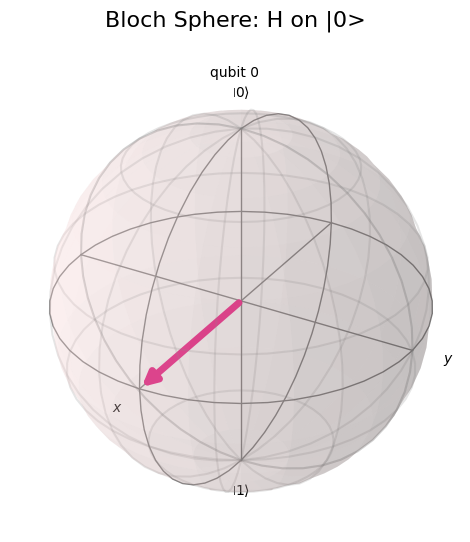

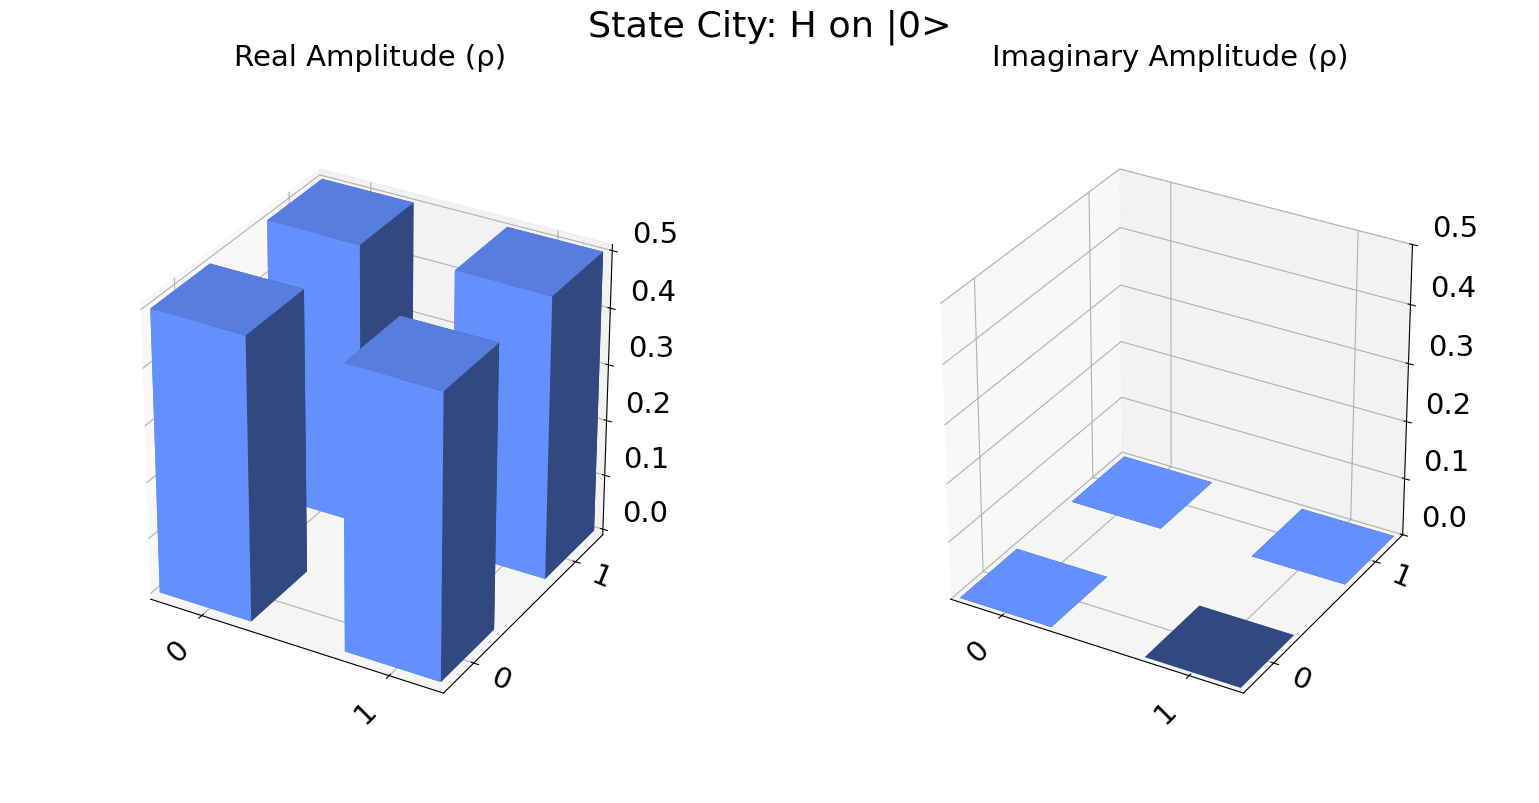

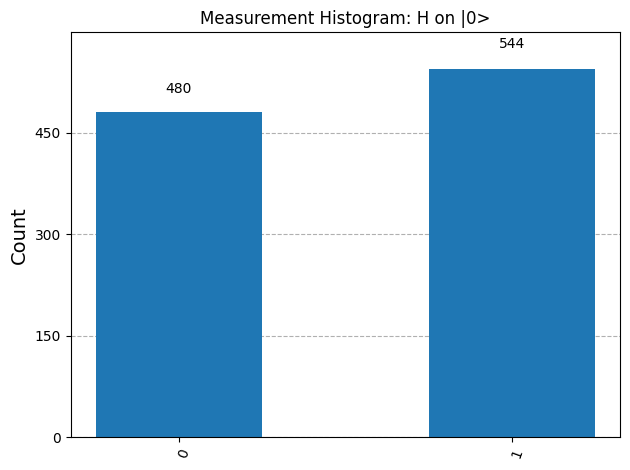

--- |1> ---
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]


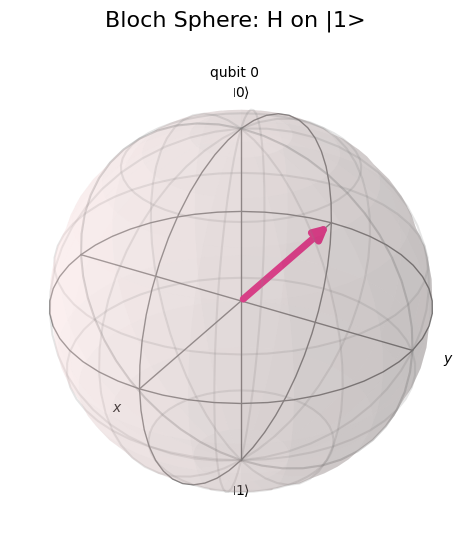

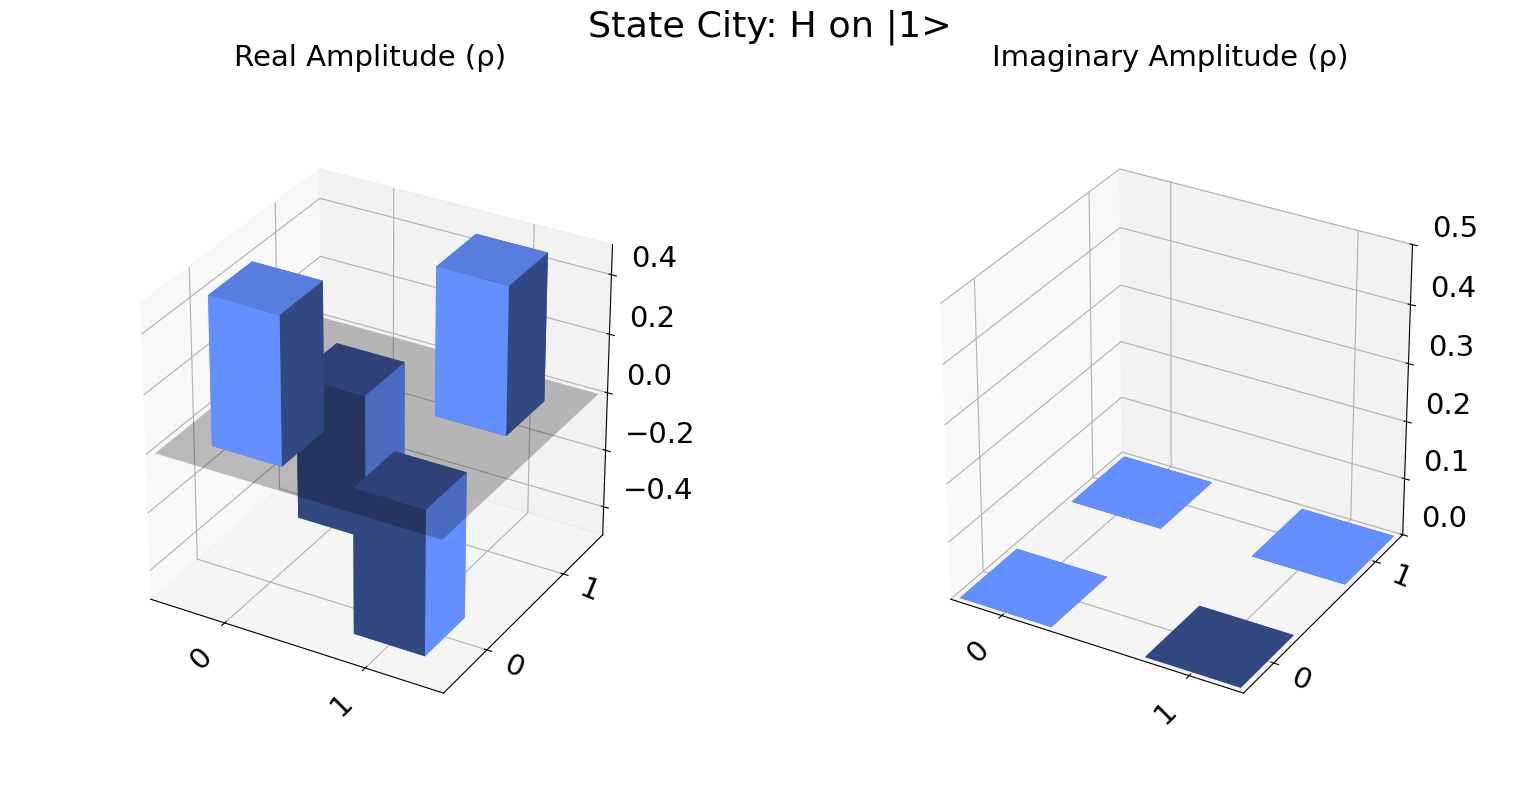

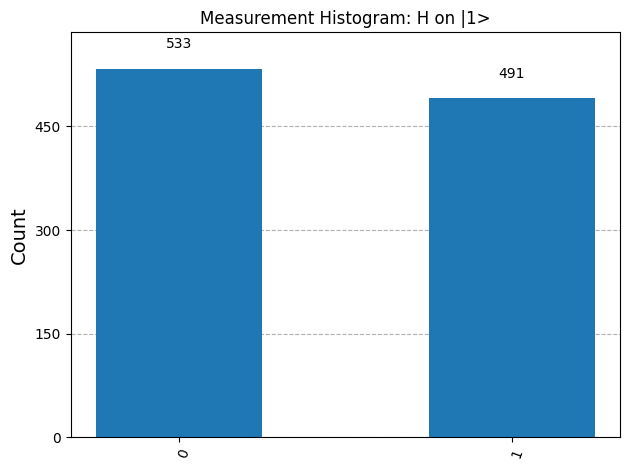

--- |+> ---
Statevector after H: [1.+0.j 0.+0.j]


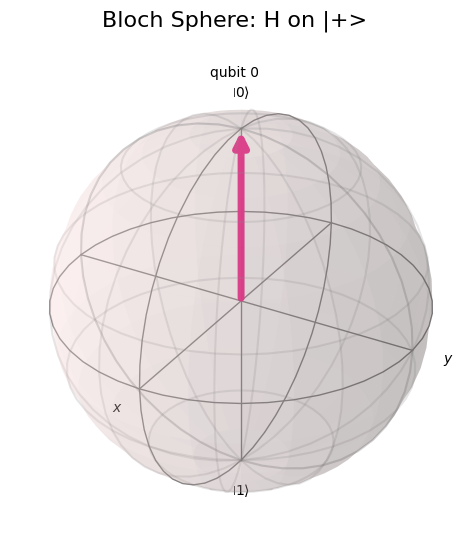

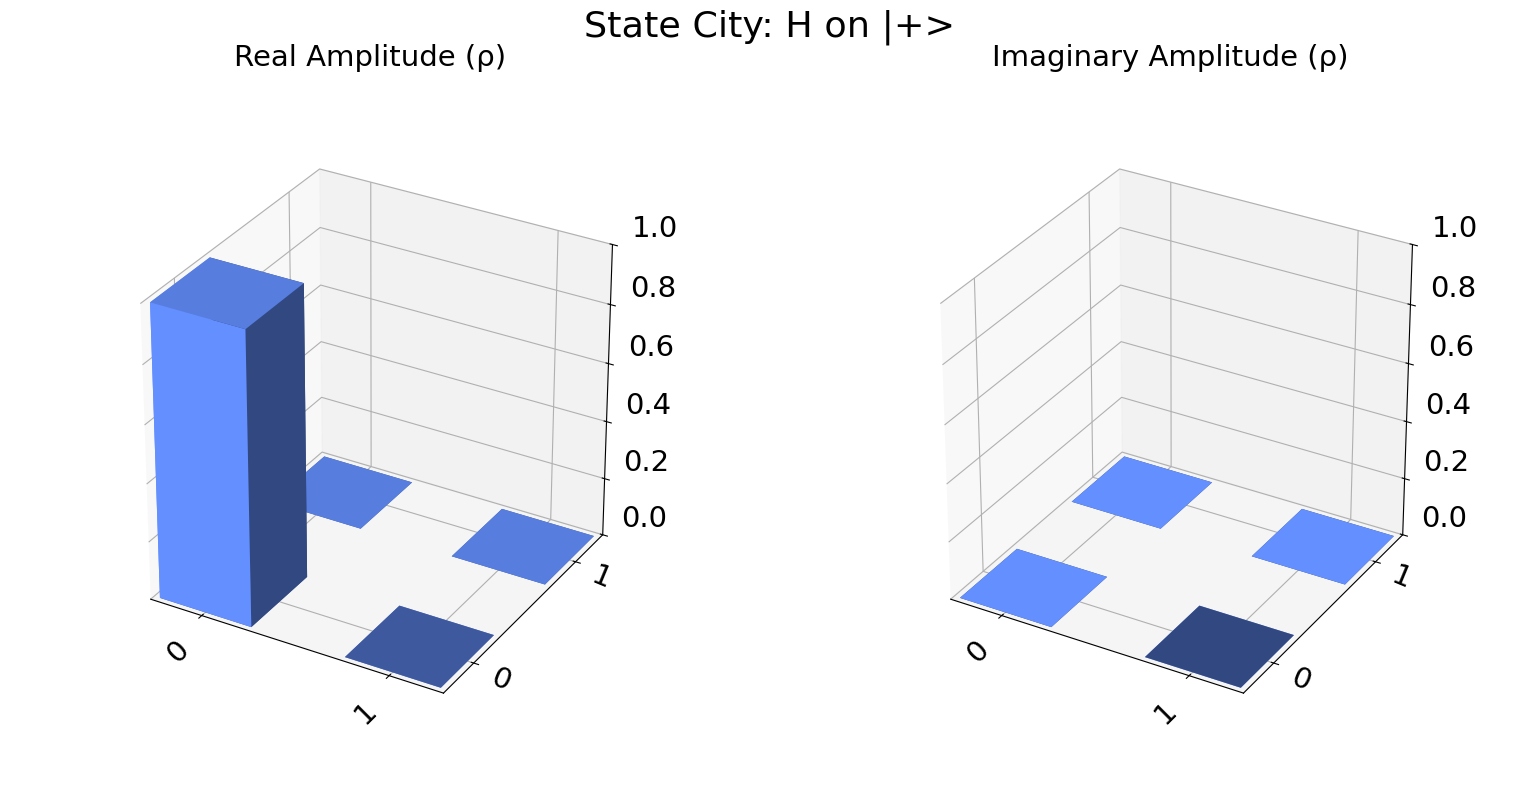

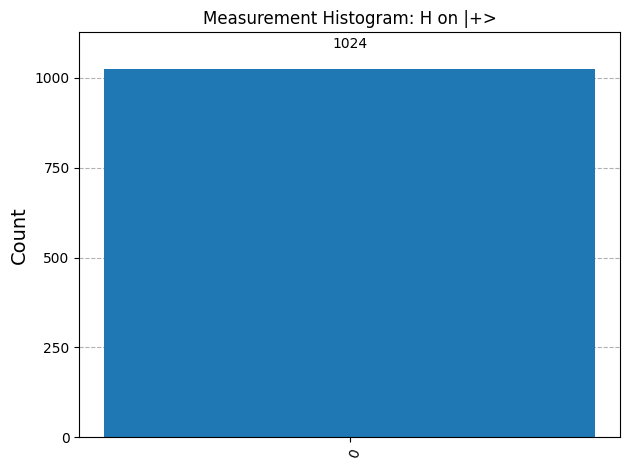

--- |-> ---
Statevector after H: [0.+0.j 1.+0.j]


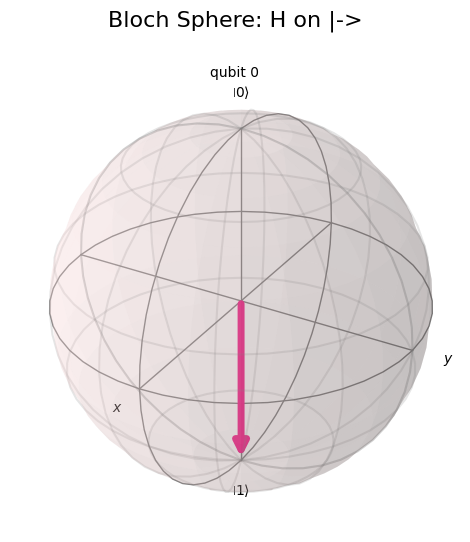

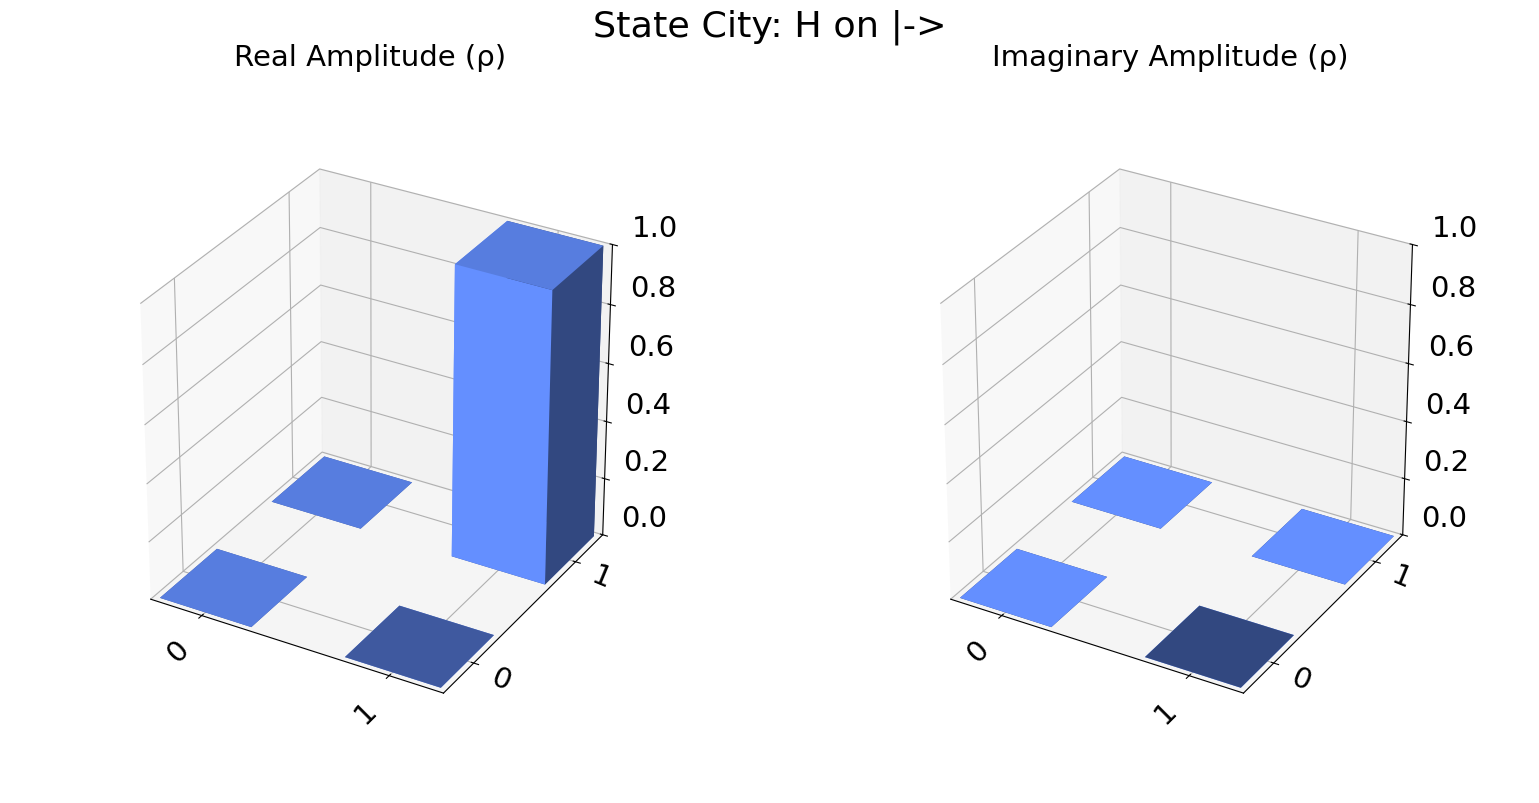

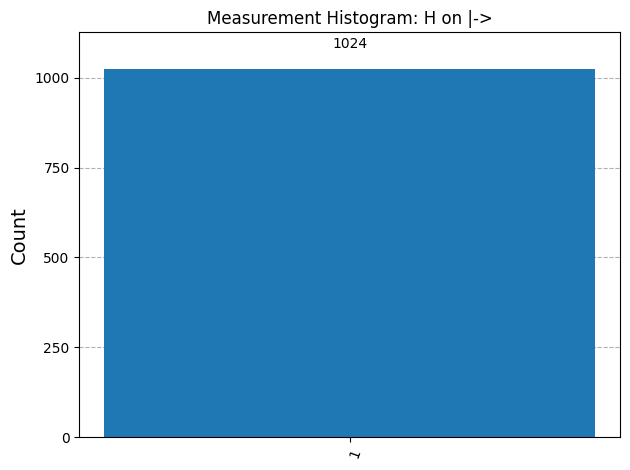

In [14]:
                  #-----------------Task 1.Predict the statevector after H on |0>, |1>, |+>, |->----------

def visualize_hadamard(init_state_vector, label):
    qc = QuantumCircuit(1, 1)
    qc.initialize(init_state_vector, 0)
    qc.h(0)
    qc.measure(0, 0)

    qc_state = QuantumCircuit(1)
    qc_state.initialize(init_state_vector, 0)
    qc_state.h(0)
    state_after = Statevector.from_instruction(qc_state)

    print(f"--- {label} ---")
    print("Statevector after H:", state_after.data)
    display(plot_bloch_multivector(state_after, title=f"Bloch Sphere: H on {label}"))
    display(plot_state_city(state_after, title=f"State City: H on {label}"))

    sim = AerSimulator()
    qc_t = transpile(qc, sim)
    result = sim.run(qc_t, shots=1024).result()
    counts = result.get_counts()
    display(plot_histogram(counts, title=f"Measurement Histogram: H on {label}"))

# Test all 4 states
visualize_hadamard(np.array([1,0]), "|0>")
visualize_hadamard(np.array([0,1]), "|1>")
visualize_hadamard(np.array([1/np.sqrt(2),1/np.sqrt(2)]), "|+>")
visualize_hadamard(np.array([1/np.sqrt(2),-1/np.sqrt(2)]), "|->")

--- Three-Qubit H⊗H⊗H ---
Statevector: [0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j
 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j 0.35355339+0.j]


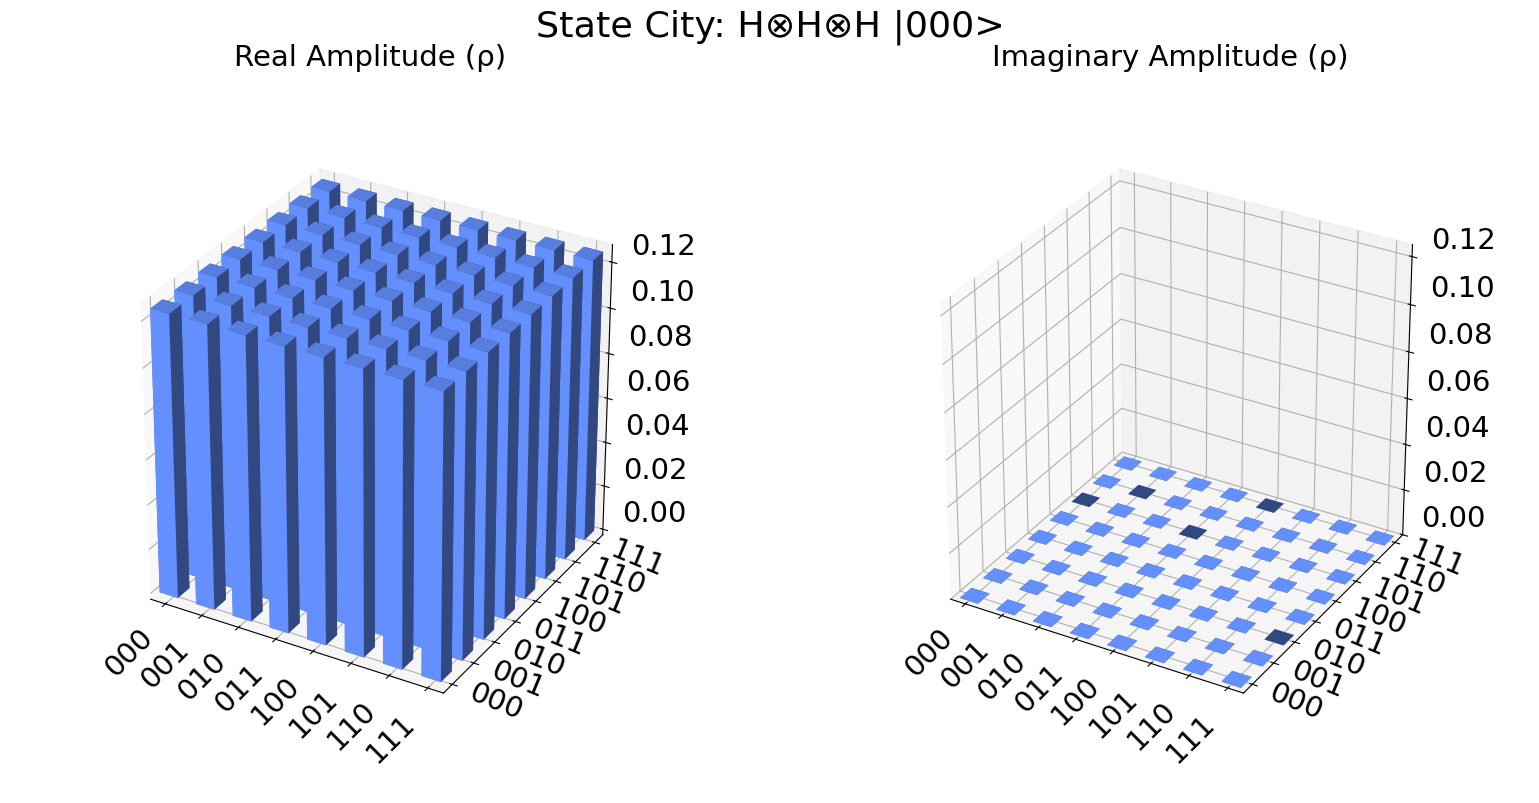

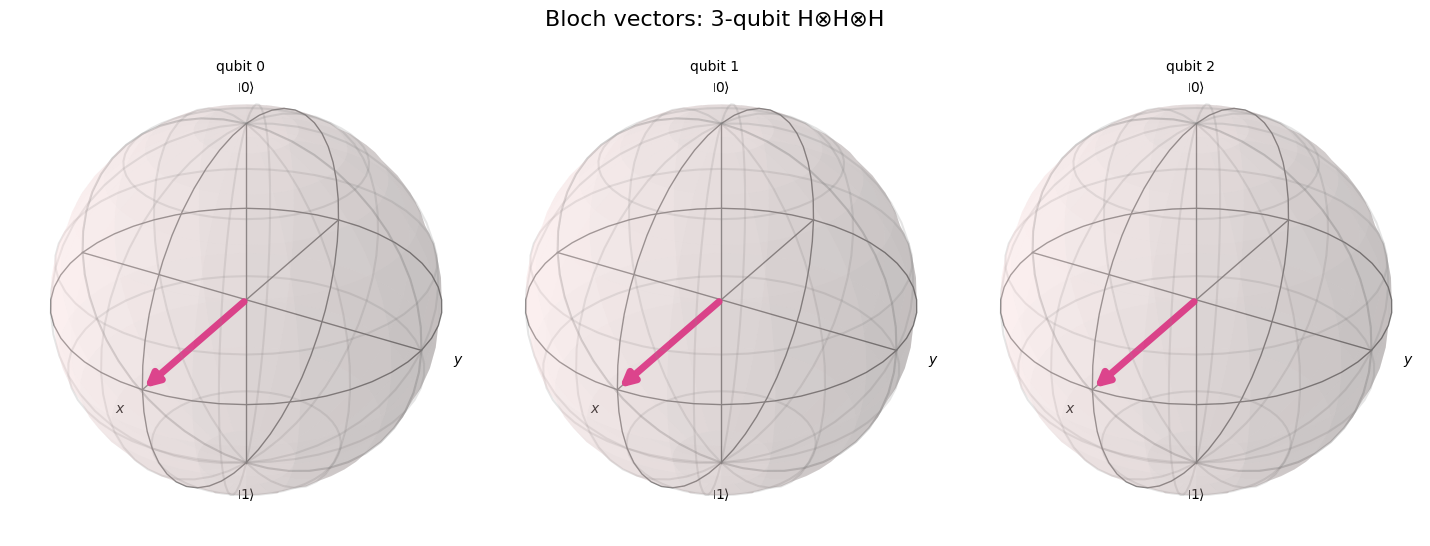

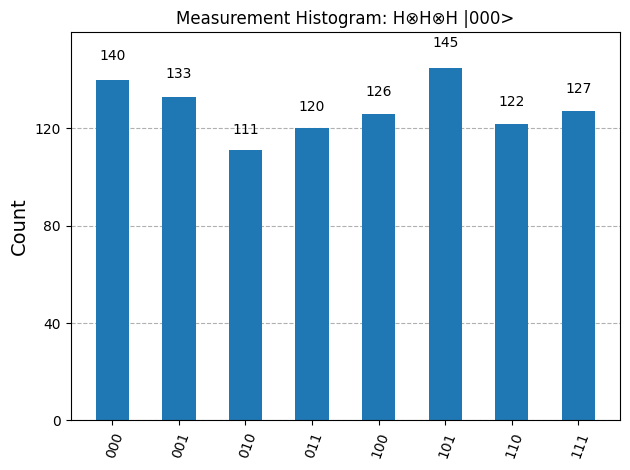

In [16]:
                      #---------------Task2. 3-qubit system with H⊗H⊗H-------------------
# 3-qubit Hadamard
qc3 = QuantumCircuit(3, 3)
qc3.h([0,1,2])
qc3.measure([0,1,2],[0,1,2])

qc3_state = QuantumCircuit(3)
qc3_state.h([0,1,2])
state3 = Statevector.from_instruction(qc3_state)

print("--- Three-Qubit H⊗H⊗H ---")
print("Statevector:", state3.data)

display(plot_state_city(state3, title="State City: H⊗H⊗H |000>"))
display(plot_bloch_multivector(state3, title="Bloch vectors: 3-qubit H⊗H⊗H"))

sim = AerSimulator()
qc3_t = transpile(qc3, sim)
result3 = sim.run(qc3_t, shots=1024).result()
counts3 = result3.get_counts()
display(plot_histogram(counts3, title="Measurement Histogram: H⊗H⊗H |000>"))


--- 3-Qubit H + CX + CX ---
Statevector: [0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


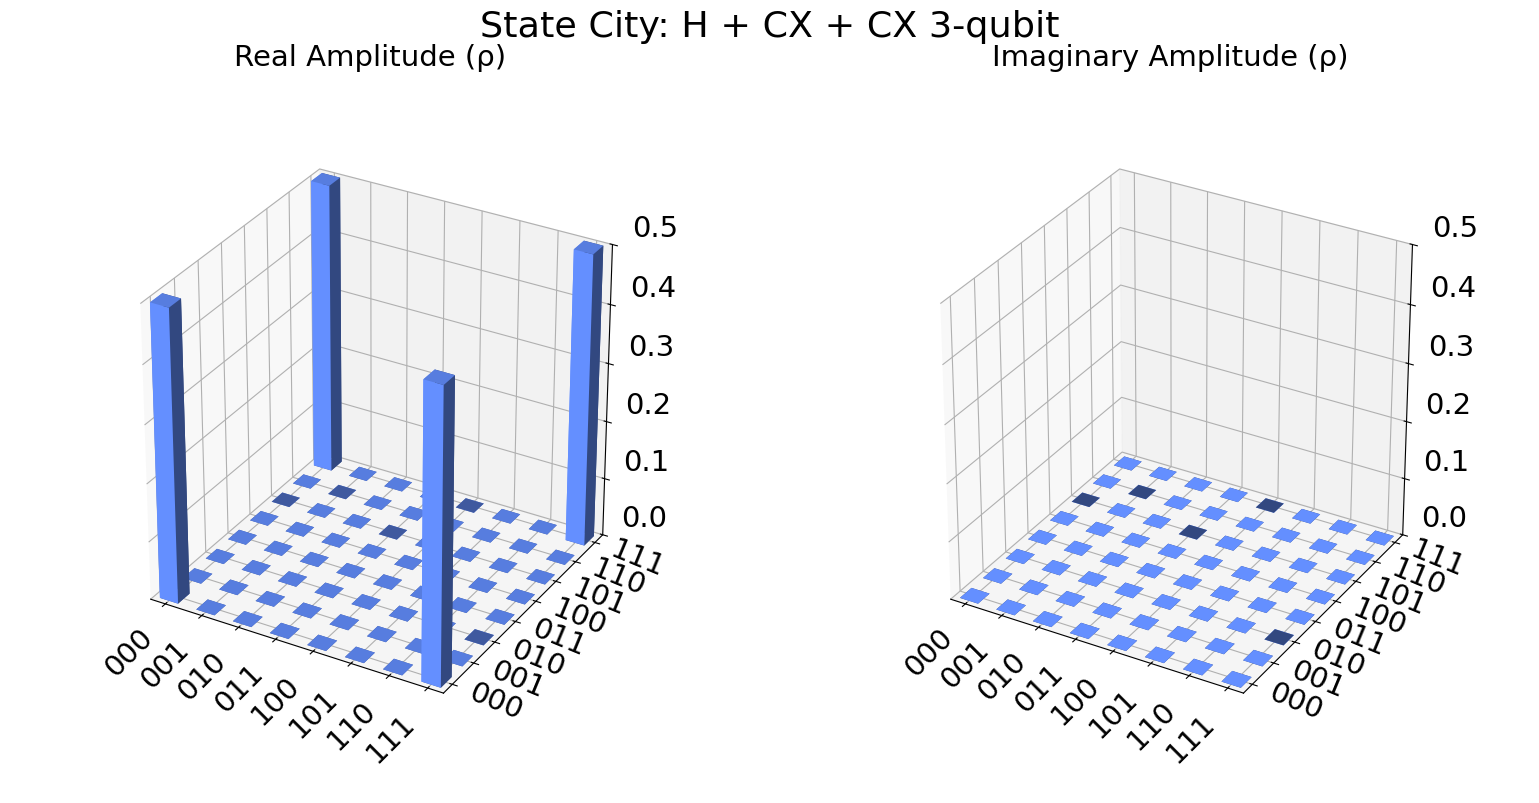

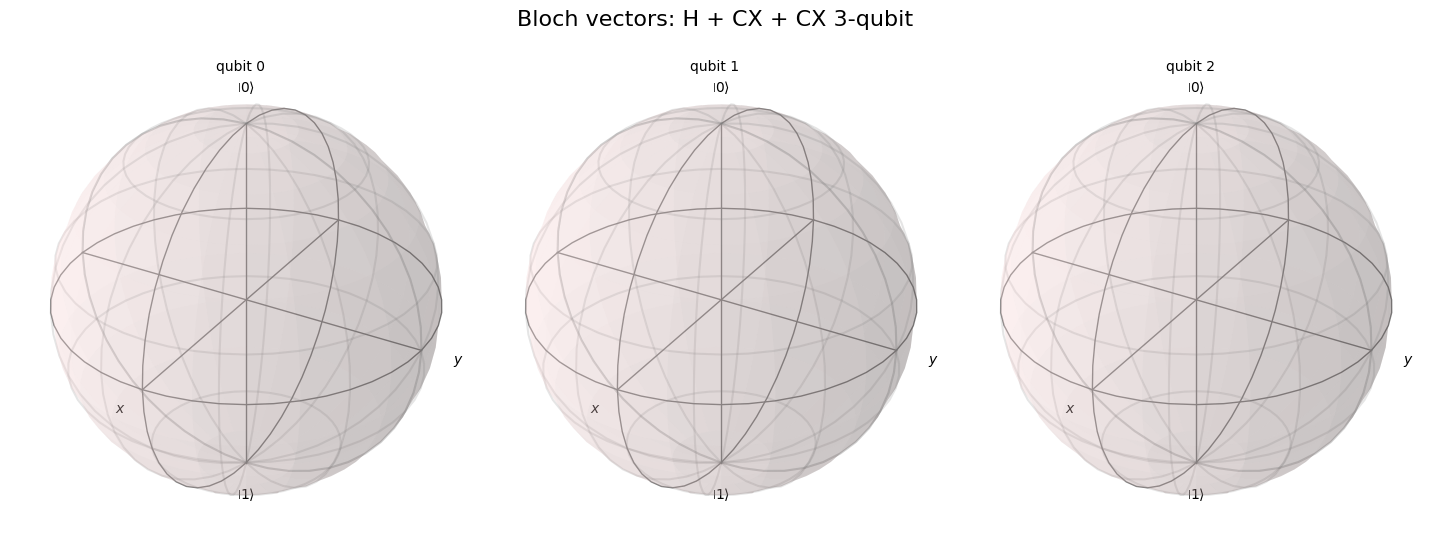

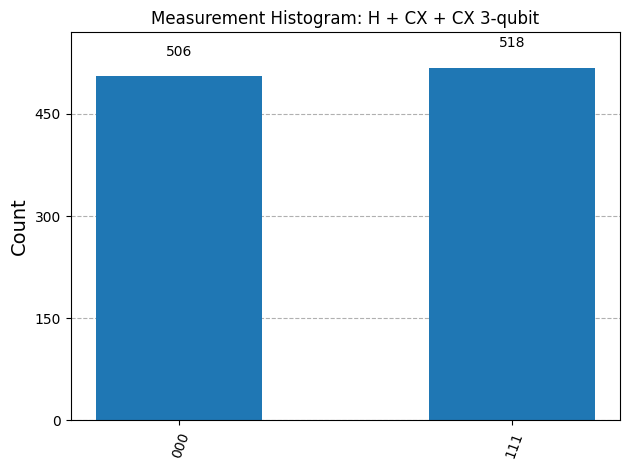

In [17]:
                    #------------Task3.H + CX + CX on 3 qubits (correlations)---------------
# 3-qubit GHZ-like state
qc3_ent = QuantumCircuit(3, 3)
qc3_ent.h(0)       # H on first qubit
qc3_ent.cx(0,1)    # CNOT 0->1
qc3_ent.cx(1,2)    # CNOT 1->2
qc3_ent.measure([0,1,2],[0,1,2])

qc3_ent_state = QuantumCircuit(3)
qc3_ent_state.h(0)
qc3_ent_state.cx(0,1)
qc3_ent_state.cx(1,2)
state3_ent = Statevector.from_instruction(qc3_ent_state)

print("--- 3-Qubit H + CX + CX ---")
print("Statevector:", state3_ent.data)

display(plot_state_city(state3_ent, title="State City: H + CX + CX 3-qubit"))
display(plot_bloch_multivector(state3_ent, title="Bloch vectors: H + CX + CX 3-qubit"))

sim = AerSimulator()
qc3_ent_t = transpile(qc3_ent, sim)
result3_ent = sim.run(qc3_ent_t, shots=1024).result()
counts3_ent = result3_ent.get_counts()
display(plot_histogram(counts3_ent, title="Measurement Histogram: H + CX + CX 3-qubit"))

In [18]:
                      #-------------Task4.Apply H twice on |1>----------------
# Initialize |1>
qc_h2 = QuantumCircuit(1)
qc_h2.initialize([0,1], 0)

# Apply H twice
qc_h2.h(0)
qc_h2.h(0)

# Get final statevector
state_h2 = Statevector.from_instruction(qc_h2)
print("Statevector after applying H twice on |1>:", state_h2.data)

Statevector after applying H twice on |1>: [0.+0.j 1.+0.j]


--- |1> ---
Statevector after H: [ 0.70710678+0.j -0.70710678+0.j]


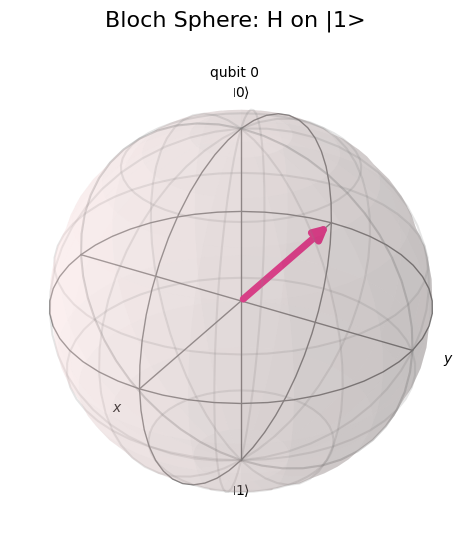

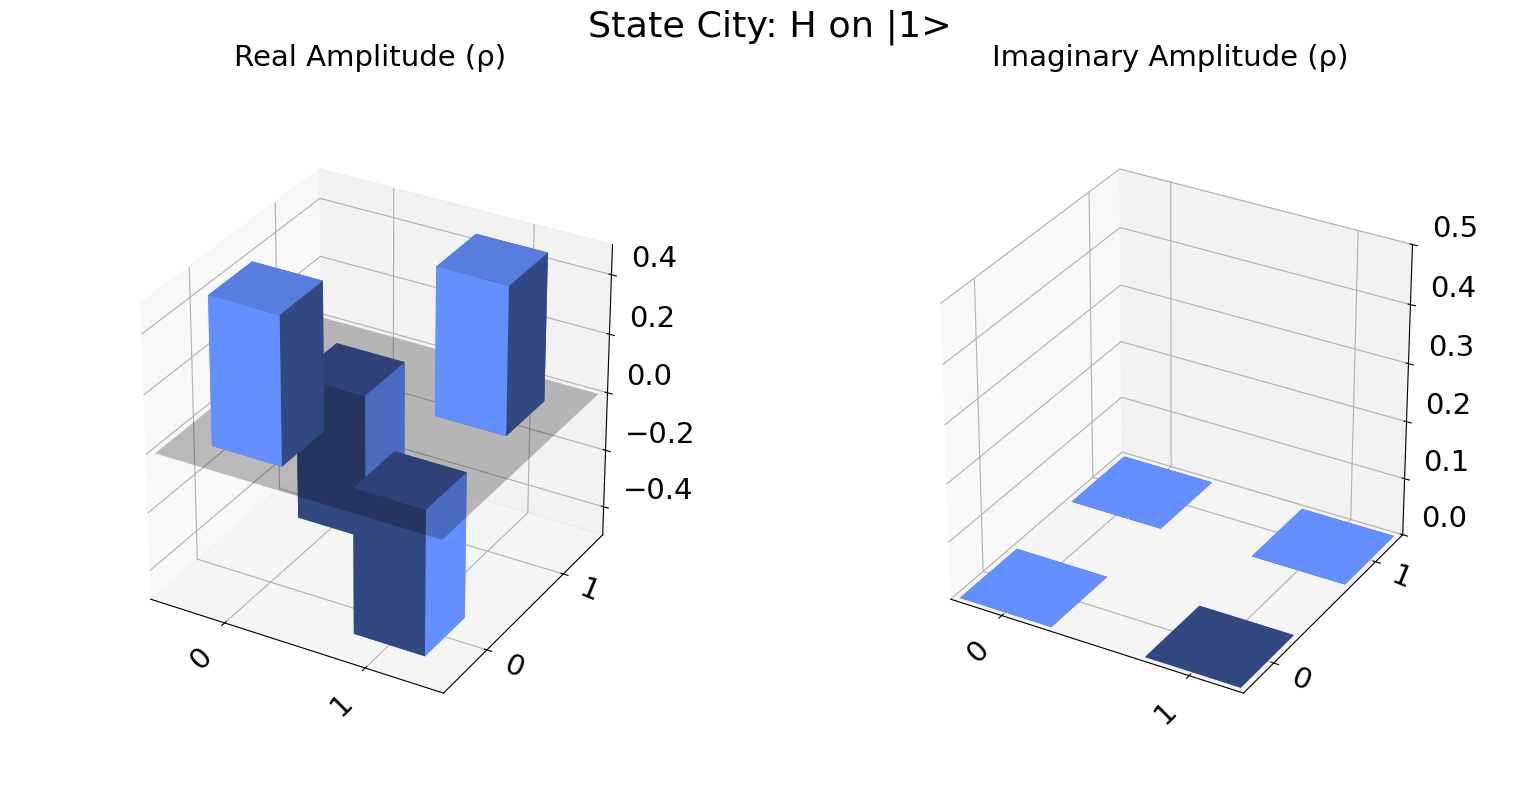

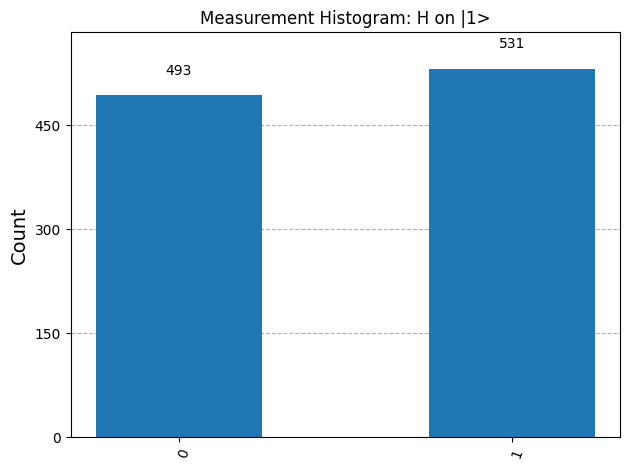

In [19]:
#-------------Task5.Bloch sphere observation after Hadamard----------
visualize_hadamard(np.array([0,1]), "|1>")